In [18]:
import numpy as np
import pandas as pd
import dabest
from scipy import stats
from statsmodels.tsa.stattools import acf as acf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette = {'BZD': '#8FB996', 'BL': '#594157'}

In [24]:
# Settings
patient = 'EL008'
channel = 'R_HIPP35'
list_conditions = ['BL','BZD']
Sampling_freq = 2000

# Load example data
LFP_by_cnd = np.load('Human_data/'+patient+' '+channel+' Example LFP metrics.npy')

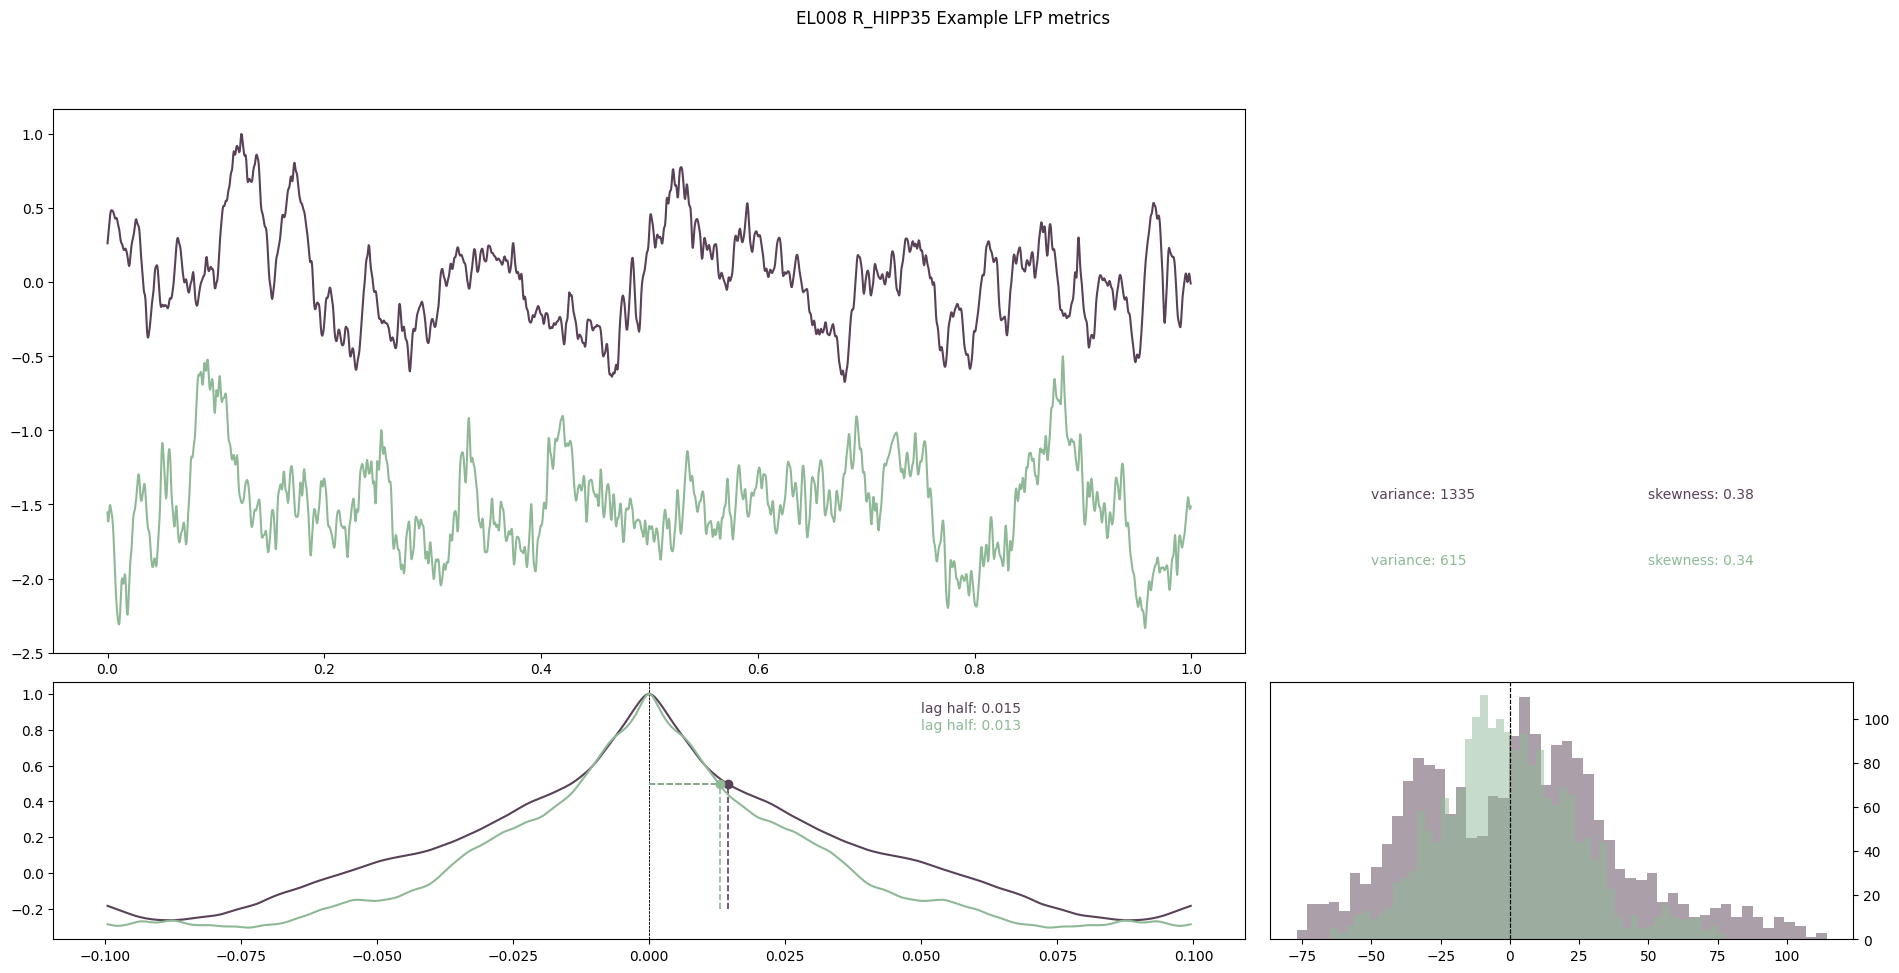

In [25]:
title = patient + " "+ channel+" Example LFP metrics"
fig2 = plt.figure(title, figsize=(20, 10)).suptitle(title)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=8, colspan=8) #LFP
ax3 = plt.subplot2grid((12, 12), (8, 0), rowspan=4, colspan=8) #Autocorr
ax4 = plt.subplot2grid((12, 12), (8, 8), rowspan=4, colspan=4)  # Histogram
x = np.arange(0, LFP_by_cnd.shape[1]/Sampling_freq, 1/Sampling_freq)

for i, cnd in enumerate(list_conditions):
    norm_LFP = LFP_by_cnd[i] / np.max(LFP_by_cnd[i])
    ax1.plot(x, norm_LFP-1.5*i, c=my_color_palette[cnd], label=cnd)

    # Calculate autocorrelation functions
    autocorr = acf(LFP_by_cnd[i] , nlags=len(LFP_by_cnd[i])/2)
    lag_half = np.min(np.argwhere(autocorr < 0.5))

    # Plot autocorrelation functions
    ax3.axvline(x=0, linestyle="dashed", linewidth=0.5, color='k')
    ax3.plot(x[:200], autocorr[:200], color=my_color_palette[cnd])
    ax3.plot(-x[:200],autocorr[:200], color=my_color_palette[cnd])
    ax3.plot([lag_half / 2000,lag_half / 2000], [-0.2,0.5], linestyle="dashed", linewidth=1.2,color=my_color_palette[cnd])
    ax3.plot([0,lag_half / 2000], [0.5,0.5],linestyle="dashed", linewidth=1.2, color=my_color_palette[cnd])
    ax3.plot(lag_half / 2000,0.5,'o',color=my_color_palette[cnd])
    ax3.text(0.05, 0.9-i*0.1, 'lag half: ' + str(f'{lag_half/2000:.3f}'), size=10, color=my_color_palette[cnd])

    # Calculate skewness and variance
    variance = np.var(LFP_by_cnd[i])
    skewness = np.abs(stats.skew(LFP_by_cnd[i], bias=False))

    # Plot histogram of EEG values
    ax4.hist(LFP_by_cnd[i], 50, alpha=0.5, color=my_color_palette[cnd])
    ax4.text(-50, 200 -(i*30), 'variance: ' + str(f'{variance:.0f}'), size=10, color=my_color_palette[cnd])
    ax4.text(50, 200 -(i*30), 'skewness: ' + str(f'{skewness:.2f}'), size=10, color=my_color_palette[cnd])
    ax4.axvline(x=0, linestyle="dashed", linewidth=0.8, color='k')
    ax4.yaxis.tick_right()

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, hspace=0.7)
plt.show()